# Test
## Resultate der Kandidierenden der Gemeinderatswahlen 2022
14.02.2022


**Importiere die notwendigen Packages**

In [299]:
#%pip install geopandas altair fiona requests folium mplleaflet contextily seaborn datetime plotly leafmap

In [300]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd
import folium 
import plotly.express as px
import seaborn as sns
import leafmap

Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [301]:
pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

### Setze einige Pfadvariabeln

- Der Packagename ist eigentlich der **Verzeichnisname** unter dem die Daten und Metadaten auf der Dropzone abgelegt werden.
- Definiert wird er bei SASA-Prozessen auf dem **Produkte-Sharepoint ([Link](https://kollaboration.intranet.stzh.ch/orga/ssz-produkte/Lists/SASA_Outputs/PersonalViews.aspx?PageView=Personal&ShowWebPart={6087A3E7-8AC8-40BA-8278-DECFACE124FF}))**.
- Der Packagename wird auf CKAN teil der URL, daher ist die exakte Schreibweise wichtig.

Beachte: im Packagename müssen alle Buchstaben **klein** geschrieben werden. Dies weil CKAN aus grossen kleine Buchstaben macht.

**BITTE HIER ANPASSEN**

In [302]:
package_name = "politik_gemeinderatswahlen_2022_resultate"

In [303]:
dataset_name = "GRW_2022_resultate_kandidierende_und_herkunft_der_stimmen.csv"

**Statische Pfade in DWH-Dropzones**

In [304]:
dropzone_path_integ = r"\\szh\ssz\applikationen\OGD_Dropzone\INT_DWH"

In [305]:
dropzone_path_prod = r"\\szh\ssz\applikationen\OGD_Dropzone\DWH"

**Statische Pfade CKAN-URLs**

In [306]:
ckan_integ_url ="https://data.integ.stadt-zuerich.ch/dataset/int_dwh_"

In [307]:
ckan_prod_url ="https://data.stadt-zuerich.ch/dataset/"

### Checke die Metadaten auf der CKAN INTEG- oder PROD-Webseite

Offenbar lassen sich aktuell im Markdownteil keine Variabeln ausführen, daher gehen wir wie unten gezeigt vor. Siehe dazu: https://data-dive.com/jupyterlab-markdown-cells-include-variables
Instead of setting the cell to Markdown, create Markdown from withnin a code cell! We can just use python variable replacement syntax to make the text dynamic

In [308]:
from IPython.display import Markdown as md

In [309]:
md(" **1. Dataset auf INTEG-Datakatalog:** Link {} ".format(ckan_integ_url+package_name))

 **1. Dataset auf INTEG-Datakatalog:** Link https://data.integ.stadt-zuerich.ch/dataset/int_dwh_politik_gemeinderatswahlen_2022_resultate 

In [310]:
md(" **2. Dataset auf PROD-Datakatalog:** Link {} ".format(ckan_prod_url+package_name))

 **2. Dataset auf PROD-Datakatalog:** Link https://data.stadt-zuerich.ch/dataset/politik_gemeinderatswahlen_2022_resultate 

### Importiere einen Datensatz 

Definiere zuerst folgende Werte:
1) Kommt der Datensatz von PROD oder INTEG?
2) Beziehst Du den Datensatz direkt ab der DROPZONE oder aus dem INTERNET?

In [311]:
#Die Datasets sind nur zum Testen auf INT-DWH-Dropzone. Wenn der Test vorbei ist, sind sie auf PROD. 
# Über den Status kann man einfach switchen

status = "prod"; #prod vs something else
data_source = "dropzone"; #dropzone vs something else
print(status+" - "+ data_source)

prod - dropzone


In [312]:
# Filepath
if status == "prod":
    if data_source == "dropzone":
            fp = dropzone_path_prod+"\\"+ package_name +"\\"+dataset_name
            print("fp lautet:"+fp)
    else:
        #fp = r"https://data.stadt-zuerich.ch/dataset/bau_neubau_whg_bausm_rinh_geb_projstatus_quartier_seit2009_od5011/download/BAU501OD5011.csv"
        fp = ckan_prod_url+package_name+'/download/'+dataset_name
        print("fp lautet:"+fp)
else:
    if data_source == "dropzone":
        fp = dropzone_path_integ+"\\"+ package_name +"\\"+dataset_name
        print("fp lautet:"+fp)
    else:
        #fp = r"https://data.stadt-zuerich.ch/dataset/bau_neubau_whg_bausm_rinh_geb_projstatus_quartier_seit2009_od5011/download/BAU501OD5011.csv"
        fp = ckan_integ_url+package_name+'/download/'+dataset_name
        print("fp lautet:"+fp)


fp lautet:\\szh\ssz\applikationen\OGD_Dropzone\DWH\politik_gemeinderatswahlen_2022_resultate\GRW_2022_resultate_kandidierende_und_herkunft_der_stimmen.csv


Beachte, wie das SAS Datum (ohne Format) in ein UNIX Datum umgerechnet und als Datumsformat dargestellt wird! Siehe dazu `https://stackoverflow.com/questions/26923564/convert-sas-numeric-to-python-datetime`

In [313]:
# Read the data
data2betested = pd.read_csv(
    fp
    , sep=','
    #,parse_dates=['Jahr']
    # KONVERTIERE DAS SAS DATUM IN EIN UNIXDATUM UND FORMATIERE ES
    #, date_parser=lambda s: epoch + datetime.timedelta(days=int(s))
    ,low_memory=False    
    )

print('done')

done


In der Folge ein paar erste Tests:

In [314]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [315]:
data2betested.head(3)

Liste_ID Liste_Cd Liste_Bez_kurz                   Liste_Bez_lang Wahlkreis  Wahlkreis_Sort  \
0         1       SP        Liste 1  SP – Sozialdemokratische Partei     1 + 2               1   
1         1       SP        Liste 1  SP – Sozialdemokratische Partei     1 + 2               1   
2         1       SP        Liste 1  SP – Sozialdemokratische Partei     1 + 2               1   

      Nachname  ... stim_verae_wl_evp stim_verae_wl_fl_zueri  ant_frmd_stim  GebJ         Titel  \
0       Schmid  ...                10                      2           12.1  1980           NaN   
1          Wey  ...                 7                      4           10.8  1982           NaN   
2  Horisberger  ...                 2                      0            6.9  1966  lic. phil. I   

                             Beruf  G  
0                 Betriebsökonomin  W  
1  Zentralsekretärin, Historikerin  W  
2  Fachjournalistin, Dozentin ZHdK  W  

[3 rows x 30 columns]

### Hilfsspalten hinzufügen (Data enrichment)

1. Anzahl Personen 
2. Alter (aktuelles Jahr-Geburtsjahr)

In [316]:
data2betested = (
    data2betested.query("Wahlkreis != 0")
    .assign(
        AnzPers=lambda x: 1,
        Alter =lambda x: 2022-x.GebJ,
    )
    .sort_values('Nachname', ascending=True)
    #.head(200)
)
#data2betested.head(1)

3. Altersgruppe

Weitere Infos zu Kategorienbildung mit Pandas cut()-Methode: https://towardsdatascience.com/all-pandas-cut-you-should-know-for-transforming-numerical-data-into-categorical-data-1370cf7f4c4f

In [317]:
bins=[17, 20, 30, 40, 50, 60, 70, 80, 90]
labels=['18-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

data2betested['Alters_grp'] = pd.cut(data2betested['Alter'], bins, labels=labels)
#data2betested.sort_values("Alter", ascending=True).head(40)

4. Erstelle eine Datetime-Objekt der Geburtsjahre

In [318]:
data2betested['GebJ_date'] = pd.to_datetime(data2betested['GebJ'], format='%Y')

5. Füge eine Variablen hinzu, welche den ersten, den zweiten und die ersten beiden Buchstaben des Namens angeben.

In [319]:
data2betested["FirstLetter"]= data2betested["Vorname"].astype(str).str[0]
data2betested["SecondLetter"]= data2betested["Vorname"].astype(str).str[1]
data2betested["FirstTwoLetters"]= data2betested["Vorname"].str.slice(stop=2)
data2betested.sort_values(by='AnzPers', ascending=False, inplace=True, na_position='first')
#.str[0]
#data2betested["StartLetter"]= data2betested["Vorname"].str.extract(r"(\d{2})")
#print(data2betested)

In [320]:
data2betested.dtypes

Liste_ID                           int64
Liste_Cd                          object
Liste_Bez_kurz                    object
Liste_Bez_lang                    object
Wahlkreis                         object
Wahlkreis_Sort                     int64
Nachname                          object
Vorname                           object
Wahlresultat                      object
total_stim                         int64
part_eig_stim                      int64
part_eig_stim_unv_wl               int64
part_frmd_stim                     int64
stim_verae_wl_SP                   int64
stim_verae_wl_FDP                  int64
stim_verae_wl_SVP                  int64
stim_verae_wl_Gruene               int64
stim_verae_wl_glp                  int64
stim_verae_wl_AL                   int64
stim_verae_wl_DieMitte             int64
stim_verae_wl_ILoveZH            float64
stim_verae_wl_PdA                  int64
stim_verae_wl_volt               float64
stim_verae_wl_evp                  int64
stim_verae_wl_fl

In [321]:
data2betested.shape

(1075, 37)

Beschreibe einzelne Attribute

In [322]:
data2betested.describe()

Liste_ID  Wahlkreis_Sort  total_stim  part_eig_stim  part_eig_stim_unv_wl  part_frmd_stim  \
count    1075.0          1075.0      1075.0         1075.0                1075.0          1075.0   
mean        5.3             5.1      1333.1         1244.8                 880.8            88.3   
std         3.3             2.5      1040.4          988.3                 663.3           126.5   
min         1.0             1.0        47.0           40.0                  14.0             0.0   
25%         3.0             3.0       499.5          459.5                 349.0            18.0   
50%         5.0             5.0      1183.0         1133.0                 835.0            43.0   
75%         7.0             8.0      1775.5         1667.5                1157.0           100.0   
max        12.0             9.0      5291.0         4734.0                2896.0          1171.0   

       stim_verae_wl_SP  ...  stim_verae_wl_PdA  stim_verae_wl_volt  stim_verae_wl_evp  \
count            1075.0  ...             1075.0               238.0             1075.0   
mean              150.5  ...                3.2                 2.4               11.0   
std               346.0  ...                9.4                 2.4               30.8   
min                 0.0  ...                0.0                 0.0                0.0   
25%                 3.0  ...                0.0                 0.0                0.0   
50%                11.0  ...                0.0                 2.0                1.0   
75%                57.5  ...                2.0                 4.0                5.0   
max              1826.0  ...              108.0                 9.0              254.0   

       ant_frmd_stim   GebJ  AnzPers  Alter  
count         1075.0 1075.0   1075.0 1075.0  
mean             7.6 1974.1      1.0   47.9  
std              8.7   14.5      0.0   14.5  
min              0.0 1936.0      1.0   18.0  
25%              2.0 1963.0      1.0   36.0  
50%              4.4 1974.0      1.0   48.0  
75%              9.7 1986.0      1.0   59.0  
max             66.8 2004.0      1.0   86.0  

[8 rows x 21 columns]

Wie viele Nullwerte gibt es im Datensatz?

In [323]:
data2betested.isnull().sum()

Liste_ID                    0
Liste_Cd                    0
Liste_Bez_kurz              0
Liste_Bez_lang              0
Wahlkreis                   0
Wahlkreis_Sort              0
Nachname                    0
Vorname                     0
Wahlresultat                0
total_stim                  0
part_eig_stim               0
part_eig_stim_unv_wl        0
part_frmd_stim              0
stim_verae_wl_SP            0
stim_verae_wl_FDP           0
stim_verae_wl_SVP           0
stim_verae_wl_Gruene        0
stim_verae_wl_glp           0
stim_verae_wl_AL            0
stim_verae_wl_DieMitte      0
stim_verae_wl_ILoveZH     934
stim_verae_wl_PdA           0
stim_verae_wl_volt        837
stim_verae_wl_evp           0
stim_verae_wl_fl_zueri      0
ant_frmd_stim               0
GebJ                        0
Titel                     903
Beruf                       0
G                           0
AnzPers                     0
Alter                       0
Alters_grp                  0
GebJ_date 

### Kennzahlen für ZdW

In [324]:
frauen = data2betested[(data2betested.G == "W")]
frauen.describe()

Liste_ID  Wahlkreis_Sort  total_stim  part_eig_stim  part_eig_stim_unv_wl  part_frmd_stim  \
count     468.0           468.0       468.0          468.0                 468.0           468.0   
mean        5.3             5.0      1408.9         1310.6                 914.2            98.3   
std         3.3             2.6      1095.3         1035.2                 680.4           127.6   
min         1.0             1.0        65.0           65.0                  20.0             0.0   
25%         3.0             3.0       518.8          464.5                 355.0            19.0   
50%         5.0             5.0      1272.0         1180.0                 892.0            49.0   
75%         7.0             7.2      1831.8         1696.2                1177.0           116.5   
max        12.0             9.0      5291.0         4734.0                2896.0           776.0   

       stim_verae_wl_SP  ...  stim_verae_wl_PdA  stim_verae_wl_volt  stim_verae_wl_evp  \
count             468.0  ...              468.0                97.0              468.0   
mean              186.6  ...                3.5                 2.7               10.2   
std               386.2  ...                9.2                 2.5               28.6   
min                 0.0  ...                0.0                 0.0                0.0   
25%                 4.0  ...                0.0                 0.0                0.0   
50%                19.5  ...                1.0                 2.0                1.0   
75%                90.2  ...                3.0                 5.0                5.0   
max              1826.0  ...              108.0                 9.0              192.0   

       ant_frmd_stim   GebJ  AnzPers  Alter  
count          468.0  468.0    468.0  468.0  
mean             7.7 1974.9      1.0   47.1  
std              8.0   13.8      0.0   13.8  
min              0.0 1939.0      1.0   18.0  
25%              2.3 1964.0      1.0   36.0  
50%              4.8 1975.0      1.0   47.0  
75%             10.1 1986.0      1.0   58.0  
max             51.4 2004.0      1.0   83.0  

[8 rows x 21 columns]

In [325]:
maenner = data2betested[(data2betested.G == "M")]
maenner.describe()

Liste_ID  Wahlkreis_Sort  total_stim  part_eig_stim  part_eig_stim_unv_wl  part_frmd_stim  \
count     607.0           607.0       607.0          607.0                 607.0           607.0   
mean        5.3             5.2      1274.6         1194.1                 855.0            80.6   
std         3.2             2.5       993.0          948.3                 649.3           125.2   
min         1.0             1.0        47.0           40.0                  14.0             0.0   
25%         3.0             3.0       493.0          451.5                 328.0            16.0   
50%         5.0             5.0      1103.0         1045.0                 805.0            36.0   
75%         7.0             8.0      1740.5         1645.5                1137.0            87.0   
max        12.0             9.0      4876.0         4558.0                2896.0          1171.0   

       stim_verae_wl_SP  ...  stim_verae_wl_PdA  stim_verae_wl_volt  stim_verae_wl_evp  \
count             607.0  ...              607.0               141.0              607.0   
mean              122.6  ...                3.0                 2.1               11.5   
std               309.0  ...                9.5                 2.3               32.3   
min                 0.0  ...                0.0                 0.0                0.0   
25%                 2.0  ...                0.0                 0.0                0.0   
50%                 8.0  ...                0.0                 1.0                1.0   
75%                40.5  ...                2.0                 4.0                4.0   
max              1684.0  ...               94.0                 8.0              254.0   

       ant_frmd_stim   GebJ  AnzPers  Alter  
count          607.0  607.0    607.0  607.0  
mean             7.5 1973.5      1.0   48.5  
std              9.2   14.9      0.0   14.9  
min              0.0 1936.0      1.0   19.0  
25%              1.8 1962.5      1.0   36.0  
50%              4.1 1973.0      1.0   49.0  
75%              9.0 1986.0      1.0   59.5  
max             66.8 2003.0      1.0   86.0  

[8 rows x 21 columns]

In [326]:
avg_geschlecht_alter = data2betested\
    .groupby(['G']) \
    .agg(avg_alter=('Alter', 'mean'), cnt=('Alter', 'count'), med_alter=('Alter', 'median'), min_alter=('Alter', 'min'), max_alter=('Alter', 'max') ) \
    .query('G != "a"') \
    .sort_values('avg_alter', ascending=False)

avg_geschlecht_alter.reset_index() 

#column.agg([np.sum, np.mean, np.std, np.median, np.var, np.min, np.max])

G  avg_alter  cnt  med_alter  min_alter  max_alter
0  M       48.5  607       49.0         19         86
1  W       47.1  468       47.0         18         83

In [327]:
#data2betested.columns

In [328]:
avg_geschlecht_partei = data2betested\
    .groupby(['Liste_Bez_kurz','Liste_Bez_lang','G']) \
    .agg(sum_pers=('AnzPers', 'sum') ) \
    .query('G != "a"') \
    .sort_values('Liste_Bez_kurz', ascending=False)

#avg_geschlecht_partei.reset_index()

In [329]:
avg_partei_alter = data2betested\
    .groupby(['Liste_Bez_kurz','Liste_Bez_lang']) \
    .agg(avg_alter=('Alter', 'mean'), cnt=('Alter', 'count'), med_alter=('Alter', 'median'), min_alter=('Alter', 'min'), max_alter=('Alter', 'max') ) \
    .query('Liste_Bez_kurz != "a"') \
    .sort_values('med_alter', ascending=False)

#avg_partei_alter.reset_index() 

In [330]:
avg_partei_alter_g = data2betested\
    .groupby(['Liste_Bez_kurz','Liste_Bez_lang']) \
    .agg(avg_alter=('Alter', 'mean'), cnt=('Alter', 'count'), med_alter=('Alter', 'median'), min_alter=('Alter', 'min'), max_alter=('Alter', 'max') ) \
    .query('Liste_Bez_kurz != "a"') \
    .sort_values('avg_alter', ascending=False)

#avg_partei_alter_g.reset_index()

### Verwende das Datum als Index

While we did already parse the `datetime` column into the respective datetime type, it currently is just a regular column. 
**To enable quick and convenient queries and aggregations, we need to turn it into the index of the DataFrame**

#### Parsing & Formatting Strings to Dataframes
- [**Cheat Sheet**](https://strftime.org/)
- Python documentation for **strptime**: [string **parse** time, Python 3](https://docs.python.org/3/library/datetime.html#datetime.datetime.strptime)
- Python documentation for strptime/**strftime**: [string **format** time,Python 3](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)



In [331]:
data2betested = data2betested.set_index("GebJ_date")

In [332]:
#data2betested.info()
data2betested.index.year.unique()
#data2betested.columns

Int64Index([1960, 1956, 1987, 1962, 1996, 1979, 1959, 1950, 1982, 1985, 1973, 1972, 1965, 1951,
            1992, 1989, 1978, 1990, 1955, 1970, 1980, 1991, 1988, 1993, 1964, 1971, 1957, 1994,
            1953, 1954, 1966, 1958, 1984, 1975, 1977, 1961, 1968, 1946, 1997, 1963, 1974, 1983,
            1936, 1986, 2001, 1967, 1969, 1981, 1949, 2002, 2004, 1944, 1945, 1995, 1976, 1998,
            1942, 1952, 1941, 2000, 1947, 1948, 1943, 1999, 1939, 1940, 2003],
           dtype='int64', name='GebJ_date')

#### Zeitpunkte und Zeiträume abfragen

A particular powerful feature of the Pandas DataFrame is its indexing capability that also works using time-based entities, such as dates and times. We have already created the index above, so let's put it to use.

In [333]:
#data2betested.loc["1970-01-01"]
data2betested[['Wahlresultat', 'Alter', 'Liste_Bez_kurz', 'Liste_Bez_lang','Nachname', 'Vorname', 'Wahlresultat', 'total_stim']].loc["1945":"1952"].query('Wahlresultat == "gewählt"').sort_values('Alter',ascending=False)


Wahlresultat  Alter Liste_Bez_kurz                   Liste_Bez_lang     Nachname  \
GebJ_date                                                                                     
1949-01-01      gewählt     73        Liste 2                FDP.Die Liberalen    Goldstein   
1951-01-01      gewählt     71        Liste 3  Schweizerische Volkspartei – SV  Im Oberdorf   

             Vorname Wahlresultat  total_stim  
GebJ_date                                      
1949-01-01   Anthony      gewählt        2253  
1951-01-01  Bernhard      gewählt         847

Sortiere einen DataFrame

In [334]:
#anz_vn_gebjahr_sex.sort_values(by='AnzGebuWir', ascending=False, na_position='first')

**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [335]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

### Aggregationen und Dataviz mit Altair

[Link zur Altair-Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

#### Selektionen und Aggregationen

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

##### Nach Geschlechterverteilung

In [336]:
data2betested.columns

Index(['Liste_ID', 'Liste_Cd', 'Liste_Bez_kurz', 'Liste_Bez_lang', 'Wahlkreis', 'Wahlkreis_Sort',
       'Nachname', 'Vorname', 'Wahlresultat', 'total_stim', 'part_eig_stim',
       'part_eig_stim_unv_wl', 'part_frmd_stim', 'stim_verae_wl_SP', 'stim_verae_wl_FDP',
       'stim_verae_wl_SVP', 'stim_verae_wl_Gruene', 'stim_verae_wl_glp', 'stim_verae_wl_AL',
       'stim_verae_wl_DieMitte', 'stim_verae_wl_ILoveZH', 'stim_verae_wl_PdA',
       'stim_verae_wl_volt', 'stim_verae_wl_evp', 'stim_verae_wl_fl_zueri', 'ant_frmd_stim',
       'GebJ', 'Titel', 'Beruf', 'G', 'AnzPers', 'Alter', 'Alters_grp', 'FirstLetter',
       'SecondLetter', 'FirstTwoLetters'],
      dtype='object')

In [337]:
sum_geschlecht_partei_resultat = data2betested.groupby(['Liste_ID', 'Liste_Cd', 'Liste_Bez_kurz', 'Liste_Bez_lang', 'G', 'Wahlresultat'])[['AnzPers']].agg('sum')
#sum_geschlecht_partei_resultat

In [338]:
sum_geschlecht_wahlkreis_resultat = data2betested.groupby(['Wahlkreis', 'G', 'Wahlresultat'])[['AnzPers']].agg('sum')
#sum_geschlecht_wahlkreis_resultat

In [339]:
sum_geschlecht_wahlkreis_liste_resultat = data2betested.groupby(['Wahlkreis','Liste_ID', 'Liste_Cd', 'Liste_Bez_kurz', 'Liste_Bez_lang', 'G', 'Wahlresultat'])[['AnzPers']].agg('sum')
#sum_geschlecht_wahlkreis_liste_resultat 

In [340]:
sum_geschlecht_altersgruppe_ListeBez_resultat = data2betested.groupby(['Liste_ID', 'Liste_Cd', 'Liste_Bez_kurz', 'Liste_Bez_lang', 'G',  'Alters_grp', 'Wahlresultat'])[['AnzPers']].agg('sum')
#sum_geschlecht_altersgruppe_ListeBez_resultat.head(100)

##### Nach Beruf

In [341]:
sum_beruf_resultat = data2betested.groupby(['Beruf', 'Wahlresultat'])[['AnzPers']].agg('sum')
#sum_beruf_resultat.sort_values('AnzPers', ascending=False)

In [342]:
sum_beruf_ListeBezeichnung_resultat = data2betested.groupby(['Beruf', 'Liste_ID', 'Liste_Cd', 'Liste_Bez_kurz', 'Liste_Bez_lang', 'Wahlresultat'])[['AnzPers']].agg('sum')
#sum_beruf_ListeBezeichnung_resultat.sort_values('AnzPers', ascending=False)

In [343]:
#data2betested.dtypes

In [344]:
sum_beruf_geschlecht_resultat = data2betested.groupby(['Beruf', 'G', 'Wahlresultat'])[['AnzPers']].agg('sum')
#sum_beruf_geschlecht_resultat.sort_values('AnzPers', ascending=False)

#### Durch Aggregierung entstandene GroupedDataFrames auflösen mit `reset_index()`

In [345]:
test = sum_geschlecht_partei.query('Wahlresultat == "gewählt"').reset_index()
test.head(2)

Liste_Bez_kurz                   Liste_Bez_lang  G Wahlresultat  AnzPers
0        Liste 1  SP – Sozialdemokratische Partei  M      gewählt       14
1        Liste 1  SP – Sozialdemokratische Partei  W      gewählt       23

#### Altair-Liniengrafik

[Link](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [346]:
alt.Chart(test.reset_index()).mark_line(strokeWidth=1).encode(
    x='Liste_Bez_lang',
    y='AnzPers',
    color='G',
    tooltip=['AnzPers','G', 'Liste_Bez_lang']  
).properties(width=800, height=200).interactive()

alt.Chart(...)

#### Barcharts mit Seaborn

In [347]:
#help(sns.catplot)     

In [348]:
#Stile for the following sns graphs
sns.set_theme(style="darkgrid", color_codes=True) #style must be one of white, dark, whitegrid, darkgrid, ticks


# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('notebook')

In [349]:
data2betested.columns

Index(['Liste_ID', 'Liste_Cd', 'Liste_Bez_kurz', 'Liste_Bez_lang', 'Wahlkreis', 'Wahlkreis_Sort',
       'Nachname', 'Vorname', 'Wahlresultat', 'total_stim', 'part_eig_stim',
       'part_eig_stim_unv_wl', 'part_frmd_stim', 'stim_verae_wl_SP', 'stim_verae_wl_FDP',
       'stim_verae_wl_SVP', 'stim_verae_wl_Gruene', 'stim_verae_wl_glp', 'stim_verae_wl_AL',
       'stim_verae_wl_DieMitte', 'stim_verae_wl_ILoveZH', 'stim_verae_wl_PdA',
       'stim_verae_wl_volt', 'stim_verae_wl_evp', 'stim_verae_wl_fl_zueri', 'ant_frmd_stim',
       'GebJ', 'Titel', 'Beruf', 'G', 'AnzPers', 'Alter', 'Alters_grp', 'FirstLetter',
       'SecondLetter', 'FirstTwoLetters'],
      dtype='object')

In [350]:
barChart = data2betested.groupby(['Wahlkreis', 'Wahlkreis_Sort', 'G', 'Wahlresultat'])[['AnzPers']].agg('sum')
#barChart.reset_index().head(2)

Text(0.5, 0.98, 'Gewählte GemeinderätInnen nach Geschlecht und Wahlkreis, 2022')

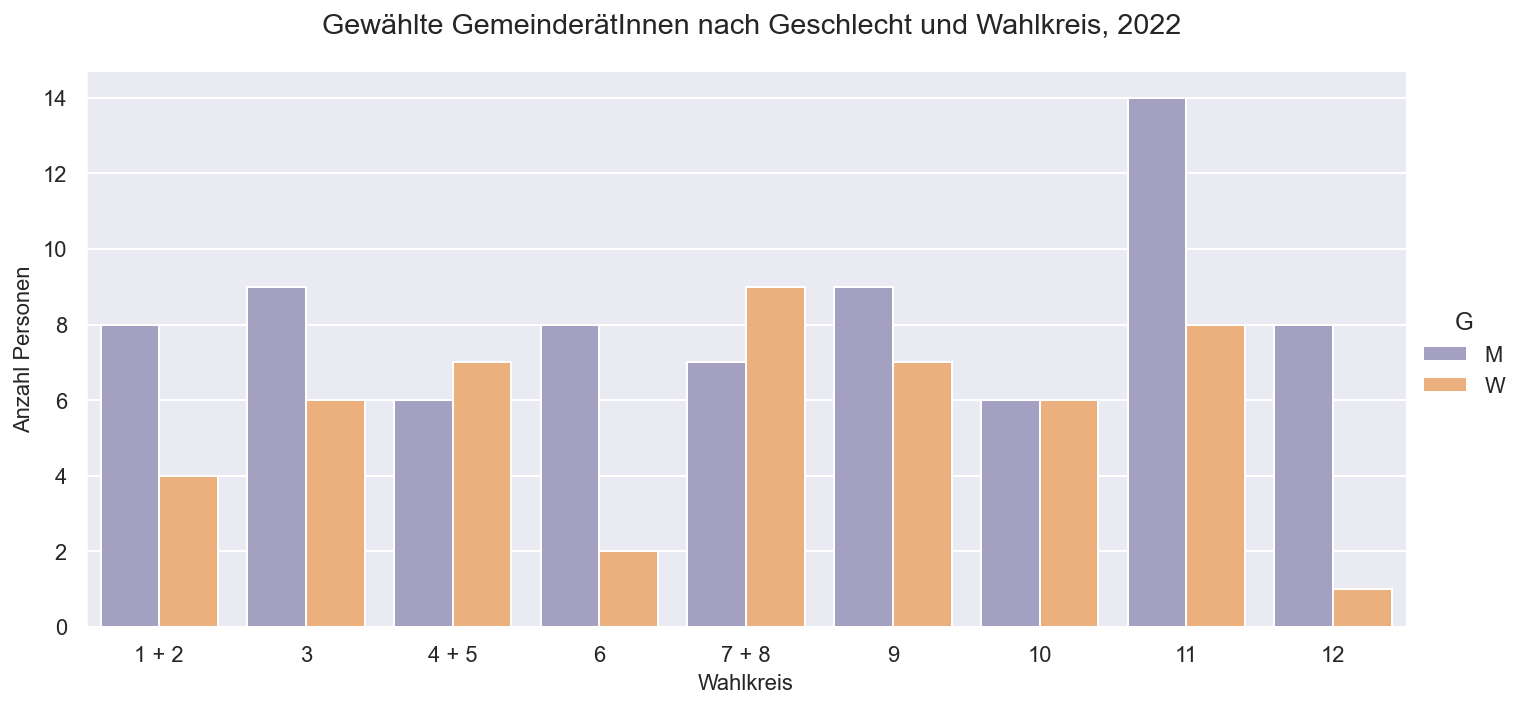

In [351]:
myTitle="Gewählte GemeinderätInnen nach Geschlecht und Wahlkreis, 2022"

#sns.color_palette("flare", as_cmap=True)
myHist = sns.catplot(x="Wahlkreis"
            , y="AnzPers"
            , hue="G"
            , kind="bar" #boxen, violin, --> wenn die aggregation nicht genau den werten in der grafik entspricht
            , palette="tab20c_r" #'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r',
            , height=5
            , aspect=2
            , edgecolor= None
            , order=None, legend_out=True
            ,data=barChart.query('Wahlresultat == "gewählt"').reset_index().sort_values('Wahlkreis_Sort', ascending = True)
           )
myHist.set_xticklabels(rotation=0)
myHist.set_xlabels('Wahlkreis', fontsize=11) # not set_label
myHist.set_ylabels('Anzahl Personen', fontsize=11)

myHist.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
myHist.fig.suptitle(myTitle)

### Daten in interaktiver Treemap zeigen

- Dazu gibt es eine sehr nützliche Webseite https://plotly.com/python/treemaps/
- Zu Farbskalen, siehe: https://plotly.com/python/builtin-colorscales/
- Weiters: https://plotly.com/python-api-reference/generated/plotly.express.treemap.html

In [352]:
import plotly.io as pio
pio.templates
pio.template = "plotly_white"

In [353]:
#data2betested.dtypes

#### Altersgruppe, Geschlecht, Liste

##### Heatmaps

In [354]:
sum_geschlecht_altersgruppe_liste_wahlkr_elected = data2betested.groupby(['Alter', 'G','Liste_ID', 'Liste_Cd', 'Liste_Bez_kurz', 'Liste_Bez_lang', 'Wahlkreis', 'Wahlkreis_Sort','Wahlresultat'])[['AnzPers']].agg('sum')
sum_geschlecht_altersgruppe_liste_wahlkr_elected.sort_values("Wahlkreis_Sort", ascending=True).head(2)

AnzPers
Alter G Liste_ID Liste_Cd Liste_Bez_kurz Liste_Bez_lang                  Wahlkreis Wahlkreis_Sort Wahlresultat          
18    W 6        AL       Liste 6        AL – Alternative Liste          1 + 2     1              nicht gewählt        1
42    W 1        SP       Liste 1        SP – Sozialdemokratische Partei 1 + 2     1              gewählt              1

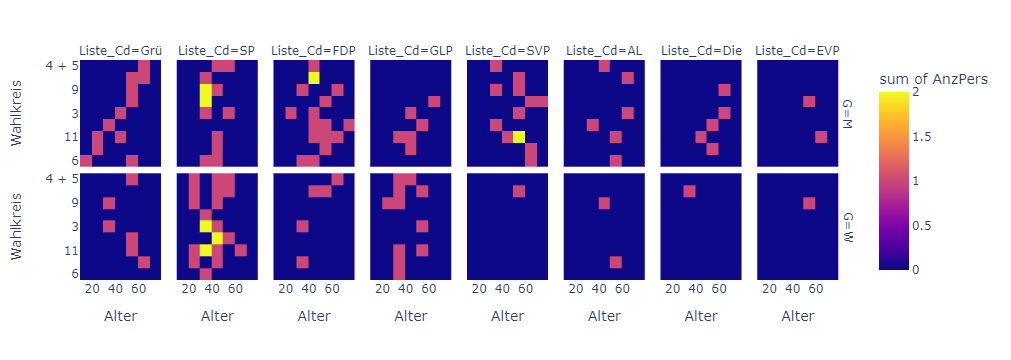

In [355]:
#df = px.data.tips()
df = sum_geschlecht_altersgruppe_liste_wahlkr_elected.reset_index().query("Wahlresultat == 'gewählt'")

fig1 = px.density_heatmap(df, x="Alter", y="Wahlkreis", z="AnzPers", histfunc="sum", facet_row="G", facet_col="Liste_Cd") #
fig1.show()

In [356]:
data2betested.columns


Index(['Liste_ID', 'Liste_Cd', 'Liste_Bez_kurz', 'Liste_Bez_lang', 'Wahlkreis', 'Wahlkreis_Sort',
       'Nachname', 'Vorname', 'Wahlresultat', 'total_stim', 'part_eig_stim',
       'part_eig_stim_unv_wl', 'part_frmd_stim', 'stim_verae_wl_SP', 'stim_verae_wl_FDP',
       'stim_verae_wl_SVP', 'stim_verae_wl_Gruene', 'stim_verae_wl_glp', 'stim_verae_wl_AL',
       'stim_verae_wl_DieMitte', 'stim_verae_wl_ILoveZH', 'stim_verae_wl_PdA',
       'stim_verae_wl_volt', 'stim_verae_wl_evp', 'stim_verae_wl_fl_zueri', 'ant_frmd_stim',
       'GebJ', 'Titel', 'Beruf', 'G', 'AnzPers', 'Alter', 'Alters_grp', 'FirstLetter',
       'SecondLetter', 'FirstTwoLetters'],
      dtype='object')

##### Treemaps

In [357]:
#sum_geschlecht_altersgruppe_ListeBez_resultat.head()

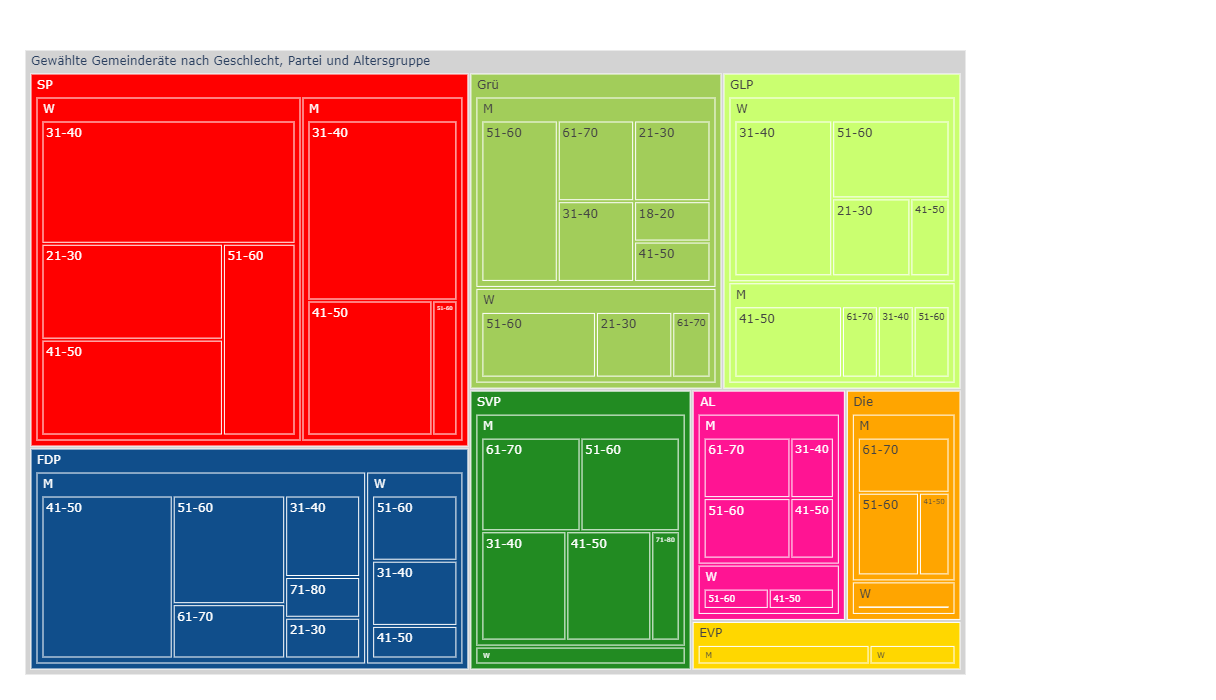

In [365]:
df = sum_geschlecht_altersgruppe_ListeBez_resultat.reset_index().query("Wahlresultat =='gewählt'")

fig = px.treemap(df, path=[px.Constant("Gewählte Gemeinderäte nach Geschlecht, Partei und Altersgruppe"), 'Liste_Cd', 'G','Alters_grp']
                 , values='AnzPers'
                 , color='Liste_Cd'
                 ## bei discrete scales (bei Klassen und Strings):                 
                 , color_discrete_map={'(?)':'lightgrey','EVP':'gold', 'SP':'red', 'PdA':'#EE3B3B', 'Grü':'#A2CD5A','GLP':'#CAFF70','Die':'orange','FDP':'#104E8B','AL':'deeppink','SVP':'forestgreen', 'FL ZÜRI':'#8B864E','Volt':'#lightblue' }                
                 ## bei continuous scales (bei Zahlenwerten):
                #, color_continuous_scale='GnBu'
                #, color_continuous_midpoint=np.average(df['AnzPers'], weights=df['AnzPers']))           
                 ,height=700
                 ,width=1300                 
                )
fig.update_traces(root_color="grey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()

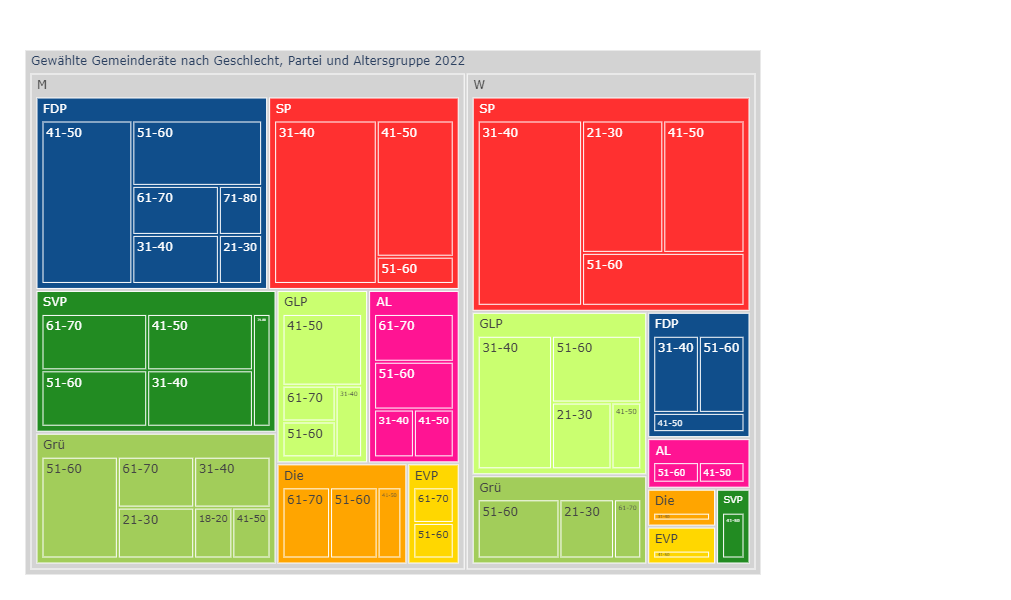

In [359]:
df = sum_geschlecht_altersgruppe_ListeBez_resultat.reset_index().query("Wahlresultat =='gewählt'")

fig = px.treemap(df, path=[px.Constant("Gewählte Gemeinderäte nach Geschlecht, Partei und Altersgruppe 2022 "), 'G','Liste_Cd', 'Alters_grp' ]
                 , values='AnzPers'
                 , color='Liste_Cd'
                 ## bei discrete scales (bei Klassen und Strings):                 
                 , color_discrete_map={'(?)':'lightgrey','EVP':'gold', 'SP':'#FF3030', 'PdA':'#EE3B3B', 'Grü':'#A2CD5A','GLP':'#CAFF70','Die':'orange','FDP':'#104E8B','AL':'deeppink','SVP':'forestgreen', 'FL ZÜRI':'#8B864E', 'Volt':'#lightblue' }                
                 ## bei continuous scales (bei Zahlenwerten):
                #, color_continuous_scale='GnBu'
                 ,height=600
                 ,width=1300               
                )
fig.update_traces(root_color="grey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()

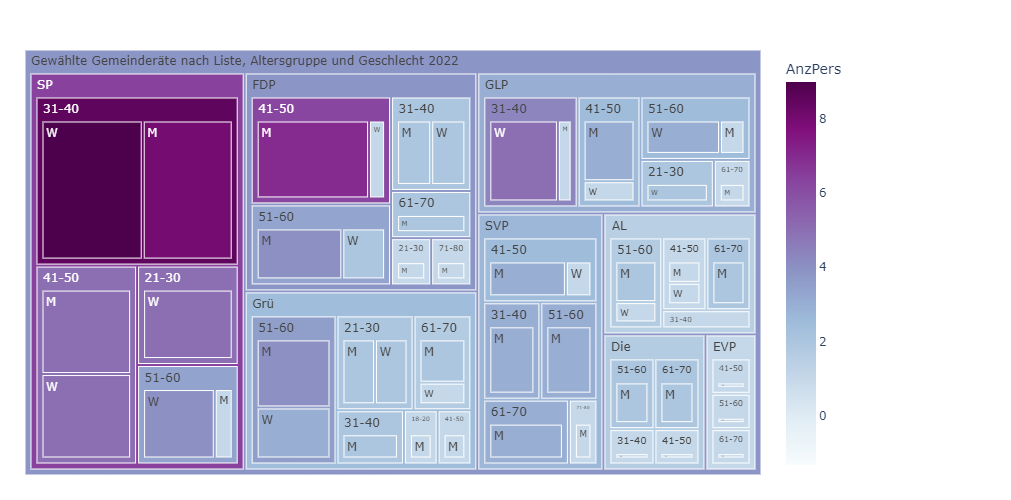

In [360]:
df = sum_geschlecht_altersgruppe_ListeBez_resultat.reset_index().query("Wahlresultat =='gewählt' & AnzPers>0")

fig = px.treemap(df, path=[px.Constant("Gewählte Gemeinderäte nach Liste, Altersgruppe und Geschlecht 2022"), 'Liste_Cd','Alters_grp', 'G']
                 ,values='AnzPers'
                 ,color='AnzPers'
                 , hover_data=['Liste_Cd']
                ,color_continuous_scale='BuPu'
                ,color_continuous_midpoint=np.average(df['AnzPers'], weights=df['AnzPers'])
                 ,height=500
                 ,width=1300               
                )                 
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()


#### Partei und Beruf
Für eine sinnvolle Darstellung müssten die Berufe kategorisiert werden.

In [361]:
#sum_beruf_ListeBezeichnung_resultat.reset_index().query("Beruf !=''")


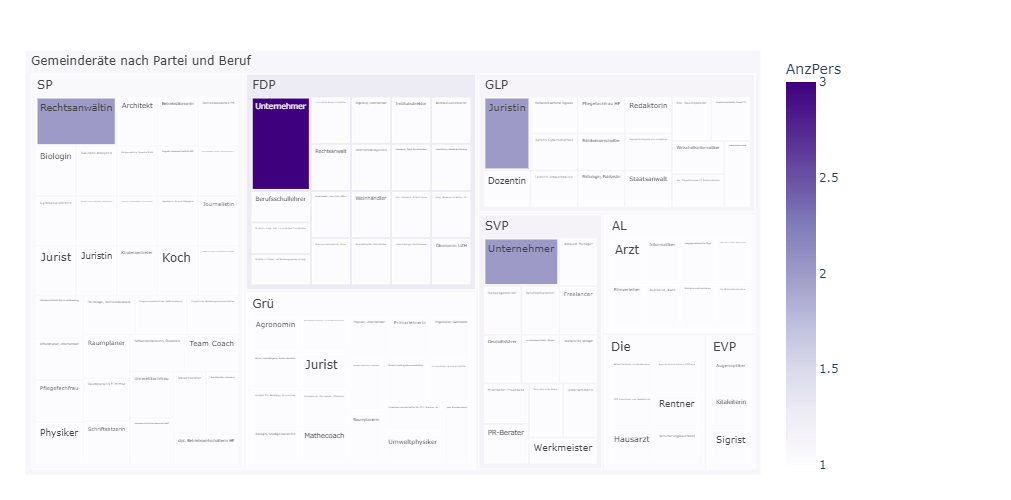

In [362]:
df = sum_beruf_ListeBezeichnung_resultat.reset_index().query("Wahlresultat =='gewählt' & Beruf !=''")

fig = px.treemap(df, path=[px.Constant("Gemeinderäte nach Partei und Beruf"), 'Liste_Cd', 'Beruf']
                 , values='AnzPers'
                 , color='AnzPers'
                 ## bei discrete scales (bei Klassen und Strings):                 
                 #, color_discrete_map={'(?)':'lightblue', 'Beruf':'gold', 'ListeBezeichnung':'darkblue'}                 
                 ## bei continuous scales (bei Zahlenwerten):
                , color_continuous_scale='purples'
                #, color_continuous_midpoint=np.average(df['AnzPers'], weights=df['AnzPers']))           
                 ,height=500
                 ,width=1300               
                )
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()


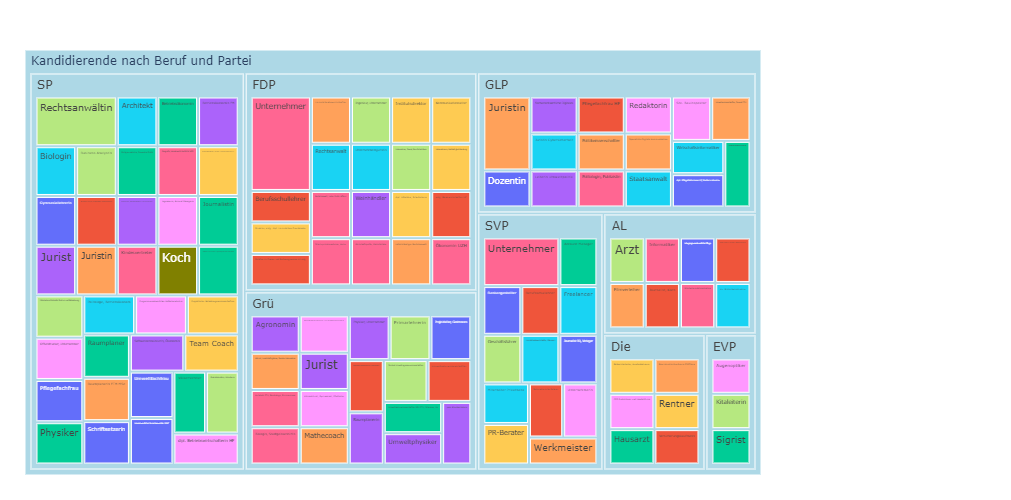

In [363]:
df = sum_beruf_ListeBezeichnung_resultat.reset_index().query("Wahlresultat =='gewählt' & Beruf !=''")

fig = px.treemap(df, path=[px.Constant("Kandidierende nach Beruf und Partei"), 'Liste_Cd', 'Beruf']
                 ## bei discrete scales (bei Klassen und Strings):
                 , values='AnzPers'
                 , color='Beruf'
                , color_discrete_map={'(?)':'lightblue', 'Koch':'olive'}                 
                 ## bei continuous scales (bei Zahlenwerten):
                #, color_continuous_scale='GnBu'
                #, color_continuous_midpoint=np.average(df['AnzPers'], weights=df['AnzPers']))           
                 ,height=500
                 ,width=1300               
                )

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()


#### HIER STEHEN GEBLIEBEN
------------------------------------

Der df müsste angepasst werden, sodass die Struktur so wäre:

- Partei
- Wahlkreis
- Jahr
- Calc: anz_frauen, anz_maenner, etc.


##### Scatter Gapminder

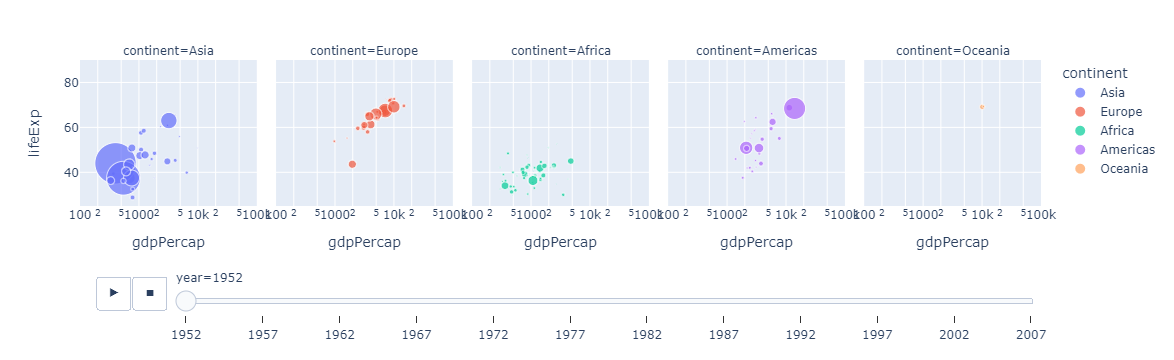

In [290]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig.show()

In [291]:
px.data.gapminder().head(2)

country continent  year  lifeExp      pop  gdpPercap iso_alpha  iso_num
0  Afghanistan      Asia  1952     28.8  8425333      779.4       AFG        4
1  Afghanistan      Asia  1957     30.3  9240934      820.9       AFG        4

In [292]:
sum_ListeKurzbez_geschlecht_altersgruppe = data2betested.groupby(['ListeKurzbez', 'Wahlkreis', 'Alters_grp', 'G'])[['AnzPers']].agg('sum')
sum_ListeKurzbez_geschlecht_altersgruppe.reset_index().head(1)

KeyError: 'ListeKurzbez'

In [293]:
df = sum_ListeKurzbez_geschlecht_altersgruppe.reset_index().query("AnzPers > 0")
df['jahr']=2022
df.dtypes

NameError: name 'sum_ListeKurzbez_geschlecht_altersgruppe' is not defined

In [ ]:
fig = px.scatter(df, x="Alters_grp", y="ListeKurzbez", animation_frame="jahr", animation_group="Alters_grp",
           size="AnzPers", color="G", hover_name="ListeKurzbez", facet_col="ListeKurzbez",
           log_x=False, size_max=45, range_x=[0,100], range_y=[0,90])
fig.show()

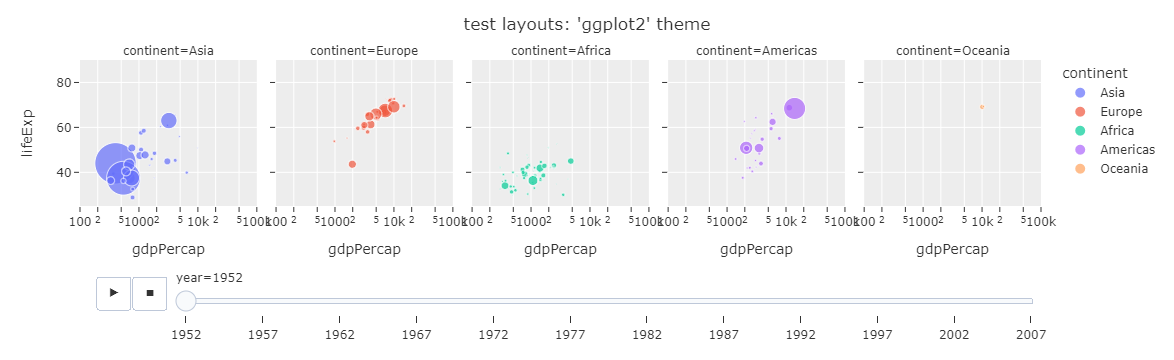

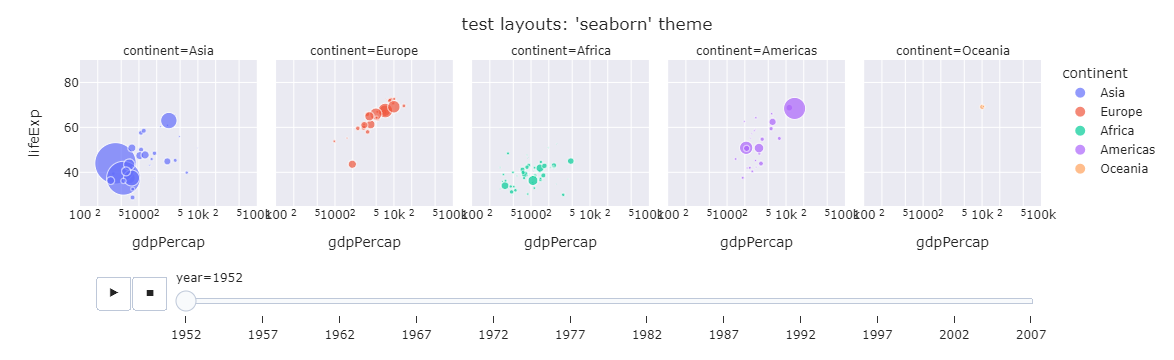

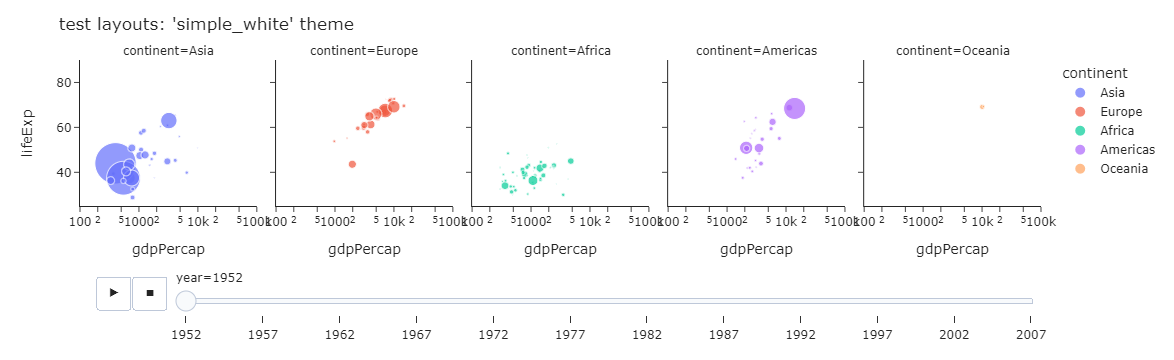

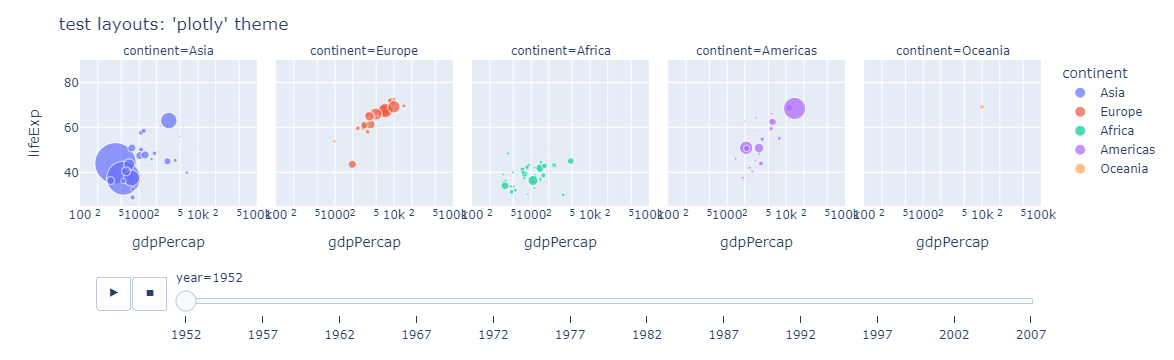

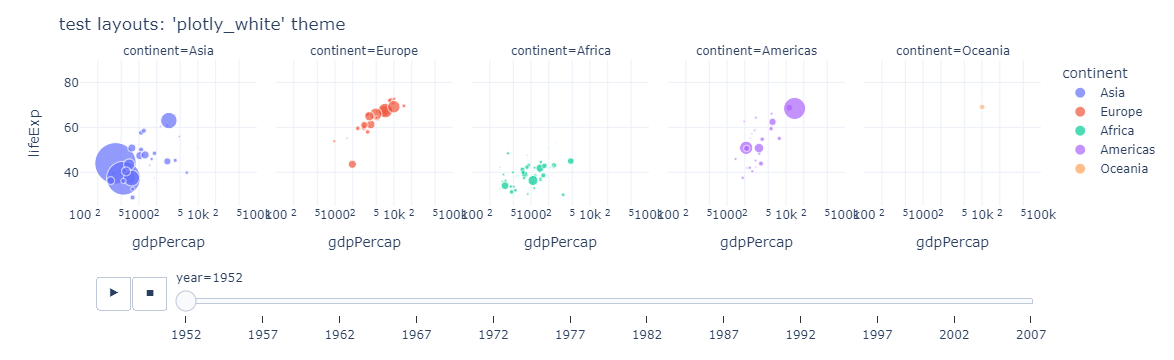

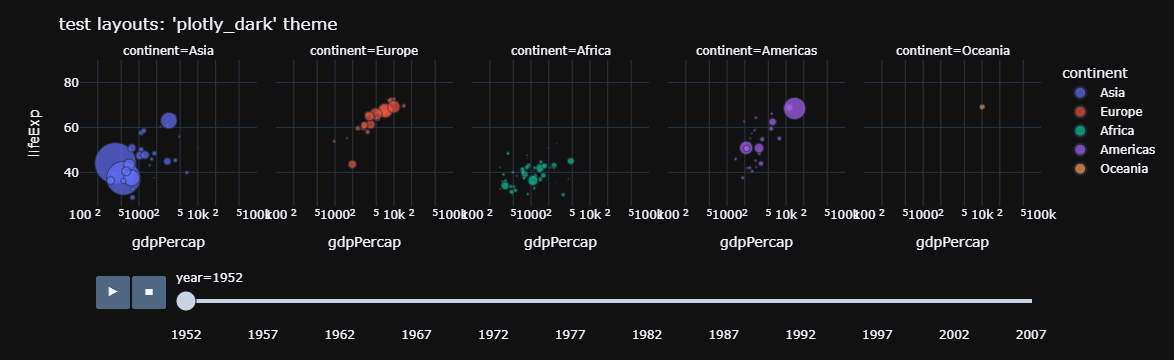

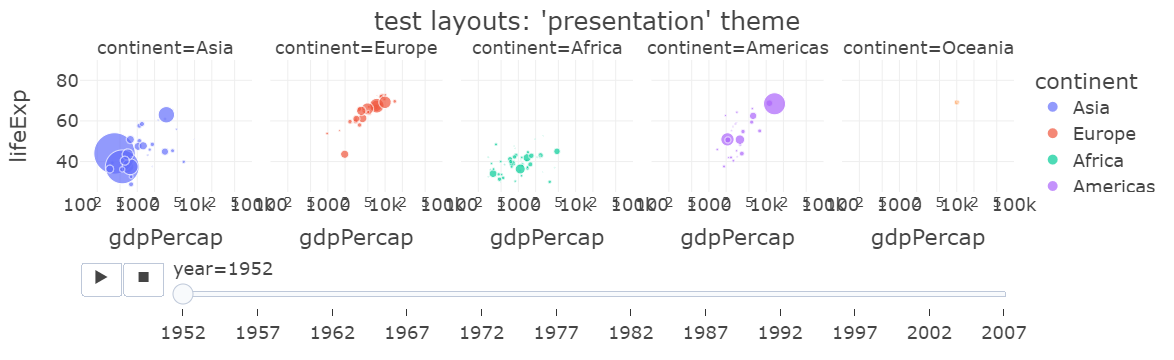

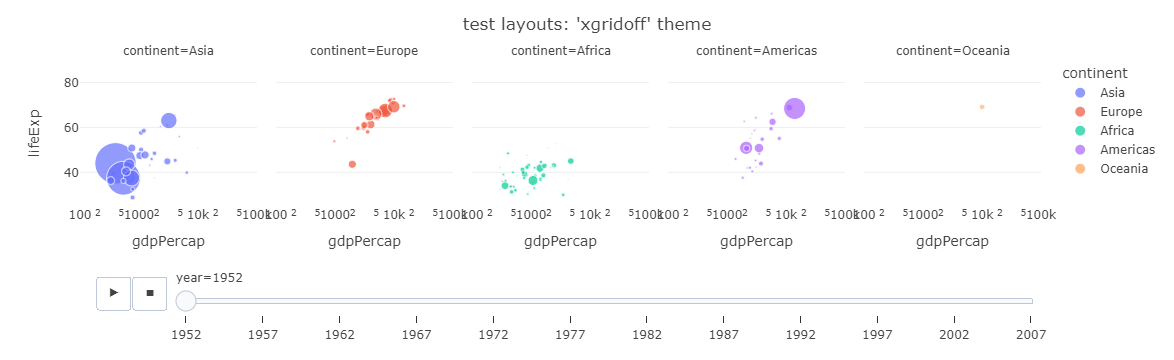

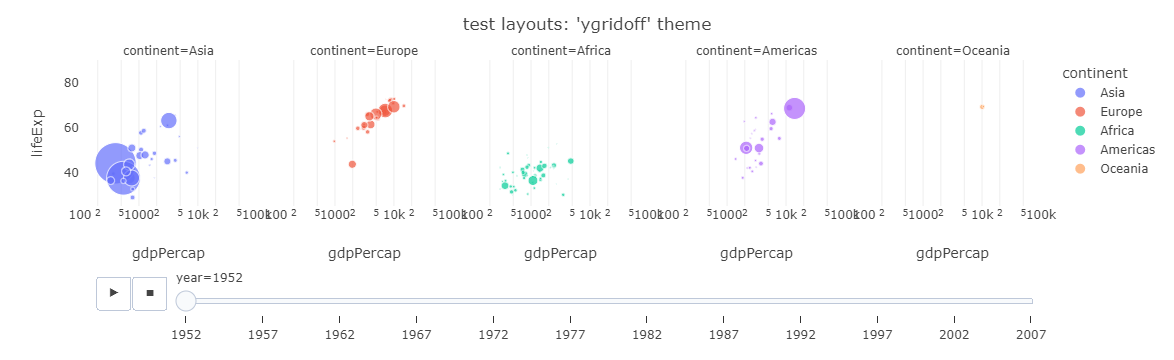

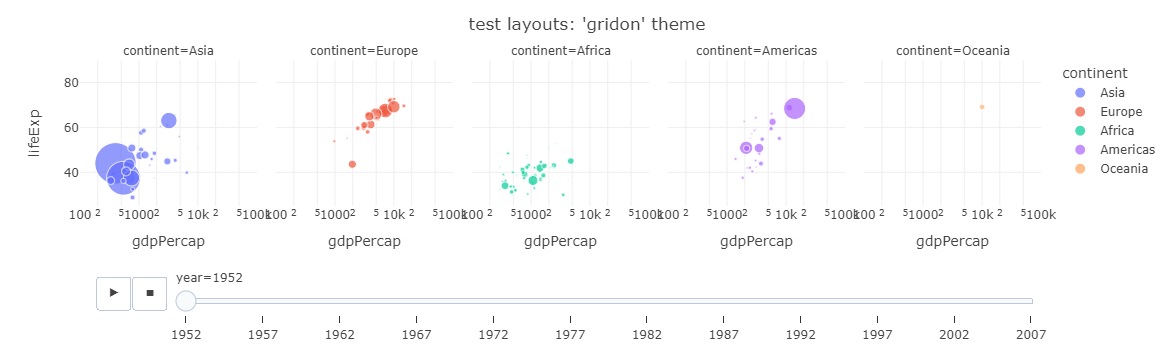

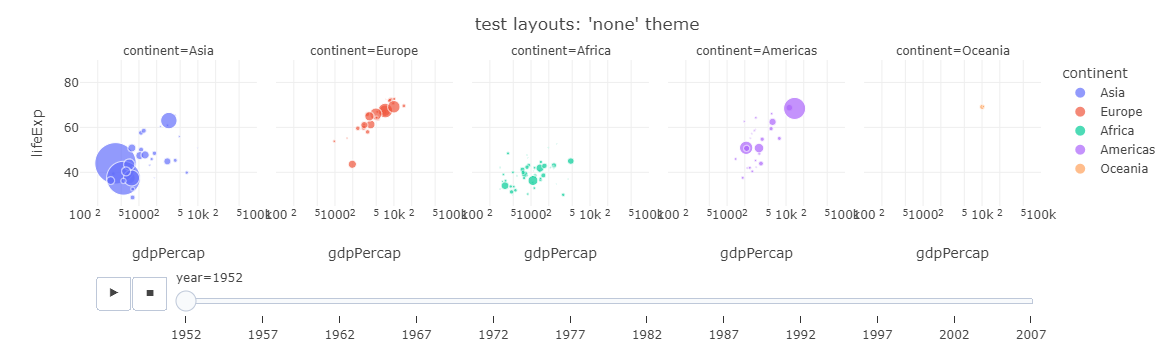

In [294]:
for template in ['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']:
    fig.update_layout(template=template, title="test layouts: '%s' theme" % template)
    fig.show()